In [6]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import h5py
import os
import seaborn as sns
from pyscf.scf.uhf import det_ovlp

# Testing in parallel code

In [126]:
filename = "Be-doubles/b_vmc_cas_9_nelecas_3_2.hdf5"
# f = h5py.File(filename, "r")

In [127]:
f.keys()

<KeysViewHDF5 ['acceptance', 'block', 'configs', 'energycorr', 'energyee', 'energyei', 'energygrad2', 'energyii', 'energyka', 'energykb', 'energyke', 'energytotal', 'energyvh', 'energyvxc', 'excitationsdelta', 'excitationsovlp_ij', 'nconfig']>

In [128]:
f['configs']

<HDF5 dataset "configs": shape (1000, 5, 3), type "<f4">

In [129]:
def plot_delta_ovlp(filename="abvmc.hdf5", hmf_filename = 'hmf.hdf5', discard = 2, annot=True):
    f = h5py.File(filename, "r")    

    fig, ax = plt.subplots(3, 2, figsize = (12, 15))    
    ovlp_ij_raw=np.array(f['excitationsovlp_ij'])
    delta_ij_raw=np.array(f['excitationsdelta'])
    ovlp_ij = np.average(ovlp_ij_raw[discard:], axis=0)
    # plt.figure()
    sns.heatmap(ovlp_ij, ax=ax[0, 0], annot=annot)
    ax[0, 0].set_title('Overlap matrix')
    # plt.title('Overlap matrix')

    ovlp_ij_std = np.std(ovlp_ij_raw[discard:], axis=0)
    sns.heatmap(ovlp_ij_std, ax=ax[1, 0], annot=annot)
    ax[1, 0].set_title('Standard deviation of overlap matrix')
    
    filtered_ovlp_ij = copy.deepcopy(ovlp_ij)
    filtered_ovlp_ij[ovlp_ij_std>np.abs(ovlp_ij)] = 0
    sns.heatmap(filtered_ovlp_ij, ax=ax[2, 0], annot=annot)
    ax[2, 0].set_title('Filtered overlap matrix')
    


    delta_ij = np.average(delta_ij_raw[discard:], axis=0)
    sns.heatmap(delta_ij, ax=ax[0, 1], annot=annot)
    ax[0, 1].set_title('Delta matrix')
                       
    delta_ij_std = np.std(delta_ij_raw[discard:], axis=0)
    sns.heatmap(delta_ij_std, ax=ax[1, 1], annot=annot)
    ax[1, 1].set_title('Standard deviation of delta matrix')
    

    filtered_delta_ij = copy.deepcopy(delta_ij)
    filtered_delta_ij[delta_ij_std>np.abs(delta_ij)] = 0
    sns.heatmap(filtered_delta_ij, ax=ax[2, 1], annot=annot)
    ax[2, 1].set_title('Filtered Delta matrix')
    f.close()

    f = h5py.File(hmf_filename, "r")    
    hmf = np.diag(np.array(f.get('hmf')))
    return {'filtered': [filtered_ovlp_ij, filtered_delta_ij, hmf], 
            'raw': [ovlp_ij_raw, delta_ij_raw, hmf]}

def get_self_energy(s, delta, h_mf, ymax = 10):
    sigma = np.matmul(np.linalg.inv(s), delta)
    fig, ax = plt.subplots(1, 3, figsize = (12,3)) 
    sns.heatmap(sigma, ax=ax[0])
    ax[0].set_title('Sigma matrix')
    sns.heatmap(h_mf, ax=ax[1])
    ax[1].set_title('Hmf matrix')

    sns.heatmap(h_mf + sigma, ax=ax[2])
    ax[2].set_title('Hmf + Sigma matrix')
    
    abvmc_eig, abvmc_eigv = np.linalg.eig(h_mf + sigma)
    abvmc_eig = np.sort(np.real(abvmc_eig))
    dft_eig = np.sort(np.diag(h_mf))    
    # dft_eig = np.diag(h_mf)

    abvmc_ref = abvmc_eig[0]
    dft_ref = dft_eig[0]
    
    plt.figure(figsize = (4, 6))
    x = np.zeros(abvmc_eig.shape)
    plt.scatter(x, 27.211*(abvmc_eig-abvmc_ref), marker="_", s=9000, linewidth=2, label='ABVMC')
    plt.scatter(x+0.01, 27.211*(dft_eig-dft_ref), marker="_", s=9000, linewidth=2, label='LDA')
    plt.xlim((-0.02, 0.03))
    plt.ylim((-ymax*0.1, ymax*1.1))
    plt.legend()
    plt.ylabel('Energy levels (eV)')
    plt.show()

    return abvmc_eig, dft_eig

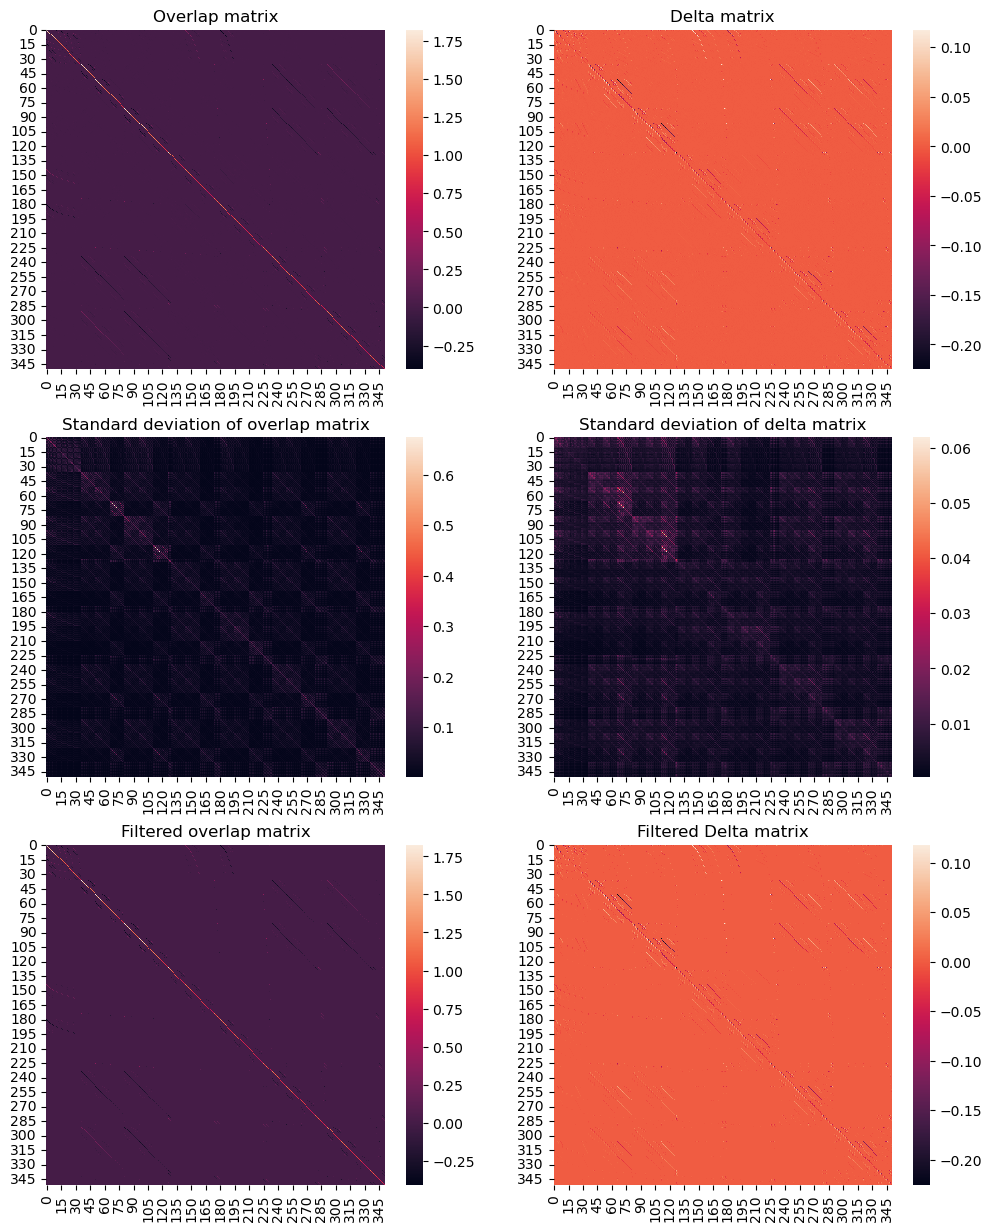

In [132]:
res = plot_delta_ovlp(filename, hmf_filename='Be-doubles/hmf.hdf5', discard=0, annot=False)
sd, deltad, hmfd = res['filtered']

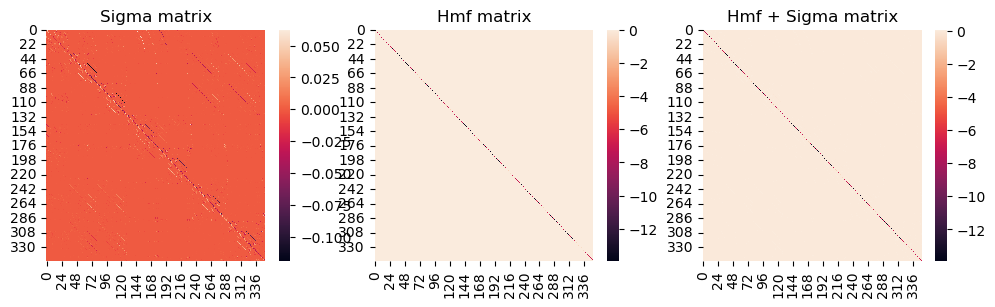

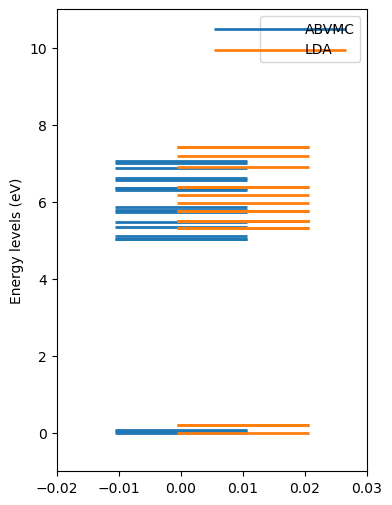

In [133]:
abvmc_eigd, dft_eigd = get_self_energy(sd, deltad, hmfd)    

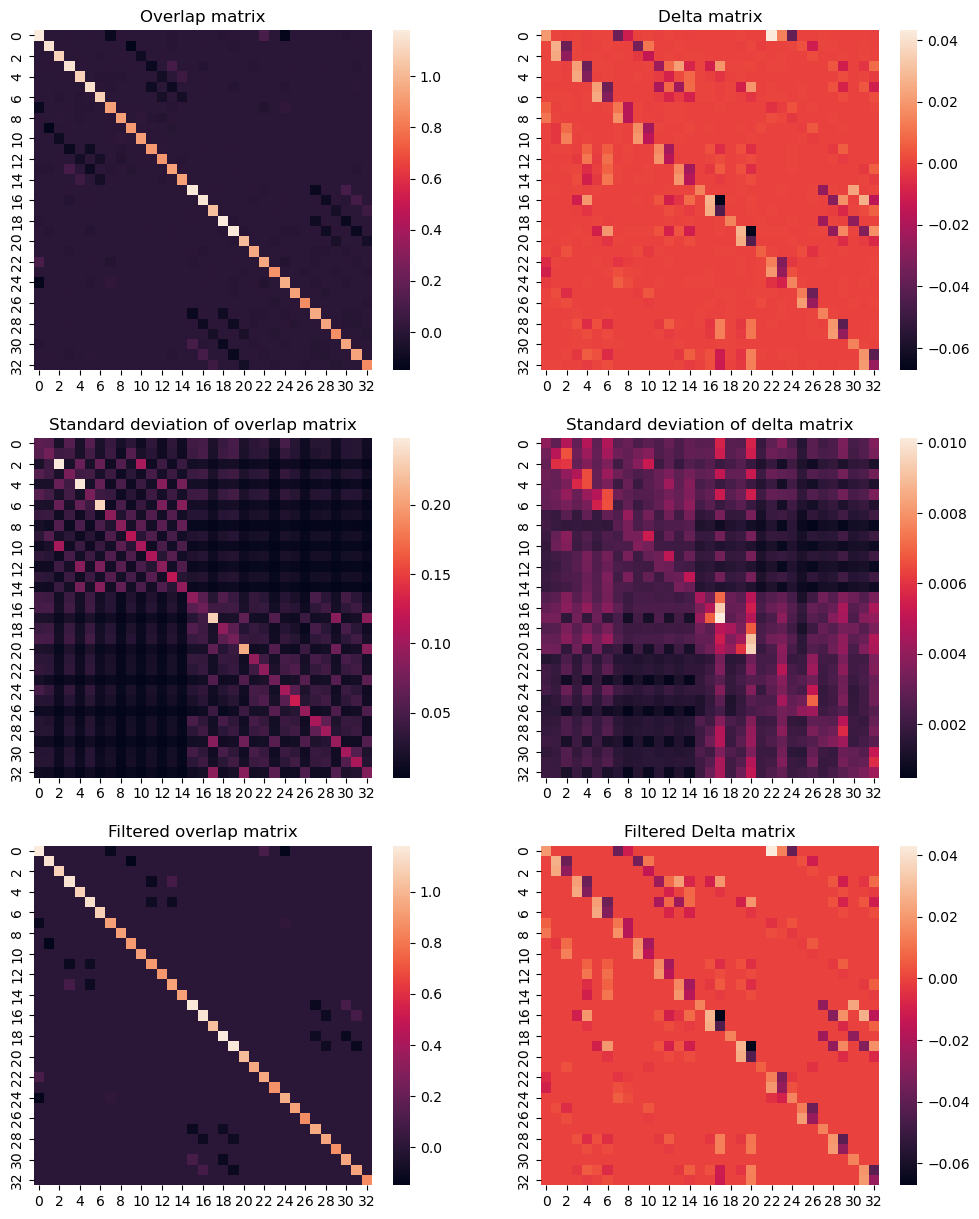

In [136]:
filename = "b_vmc_cas_9_nelecas_3_2.hdf5"
res = plot_delta_ovlp(filename, discard=0, annot=False)
s, delta, hmf = res['filtered']

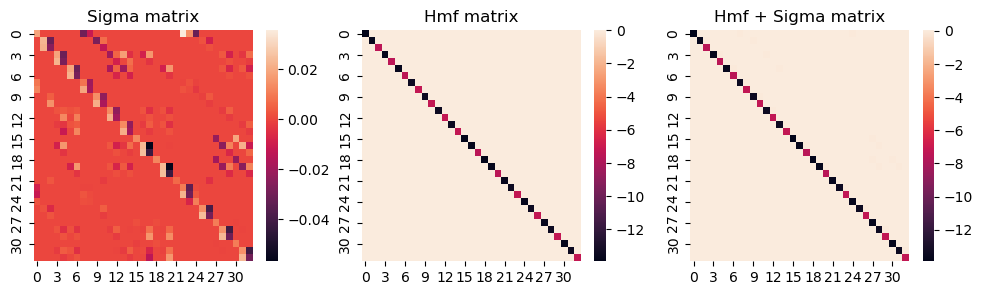

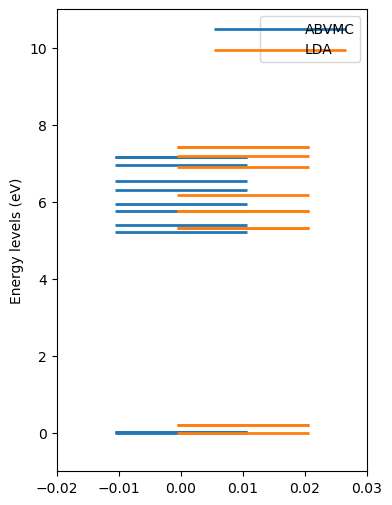

In [137]:
abvmc_eig, dft_eig = get_self_energy(s, delta, hmf)    

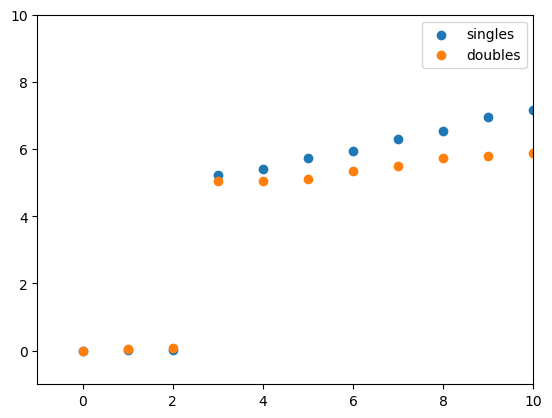

In [149]:
plt.scatter(np.arange(abvmc_eig.shape[0]), (abvmc_eig-abvmc_eig[0])*27.211, label='singles')
plt.scatter(np.arange(abvmc_eigd.shape[0]), (abvmc_eigd-abvmc_eigd[0])*27.211, label='doubles')
plt.legend()
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.show()

AttributeError: module 'pyscf' has no attribute 'fci'